In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

In [3]:
# metadata 
print(car_evaluation.metadata) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [4]:
print(car_evaluation.variables)

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

## Predict buying price from maintenance, number of doors, lug boot size, safety and class value

buying:   vhigh, high, med, low.

maint:    vhigh, high, med, low.

doors:    2, 3, 4, 5more.

persons:  2, 4, more.

lug_boot: small, med, big.

safety:   low, med, high.

Class Labels: unacc, acc, good, vgood

In [5]:
car_evaluation_df = car_evaluation.data['original'].drop('persons', axis=1)
car_evaluation_df

,buying,maint,doors,lug_boot,safety,class
0,vhigh,vhigh,2,small,low,unacc
1,vhigh,vhigh,2,small,med,unacc
2,vhigh,vhigh,2,small,high,unacc
3,vhigh,vhigh,2,med,low,unacc
4,vhigh,vhigh,2,med,med,unacc
...,...,...,...,...,...,...
1723,low,low,5more,med,med,good
1724,low,low,5more,med,high,vgood
1725,low,low,5more,big,low,unacc
1726,low,low,5more,big,med,good


### Visualising relationship between buying price and the rest of the parameters

In [6]:
# Convert columns to categorical data type
car_evaluation_df['buying'] = car_evaluation_df['buying'].astype('category')
car_evaluation_df['maint'] = car_evaluation_df['maint'].astype('category')
car_evaluation_df['doors'] = car_evaluation_df['doors'].astype('category')
car_evaluation_df['lug_boot'] = car_evaluation_df['lug_boot'].astype('category')
car_evaluation_df['safety'] = car_evaluation_df['safety'].astype('category')
car_evaluation_df['class'] = car_evaluation_df['class'].astype('category')

<Figure size 864x576 with 0 Axes>

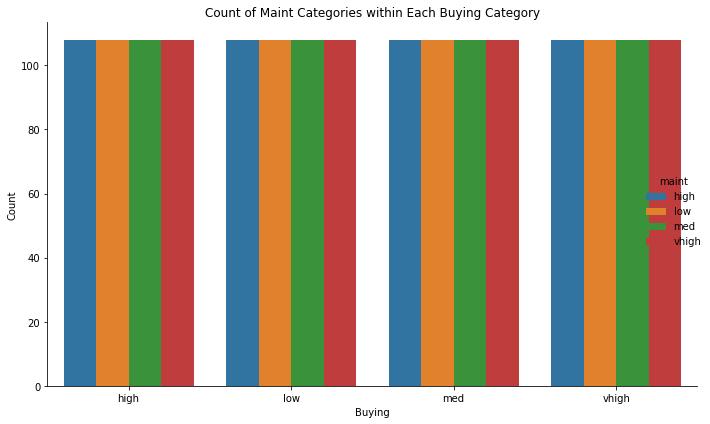

<Figure size 864x576 with 0 Axes>

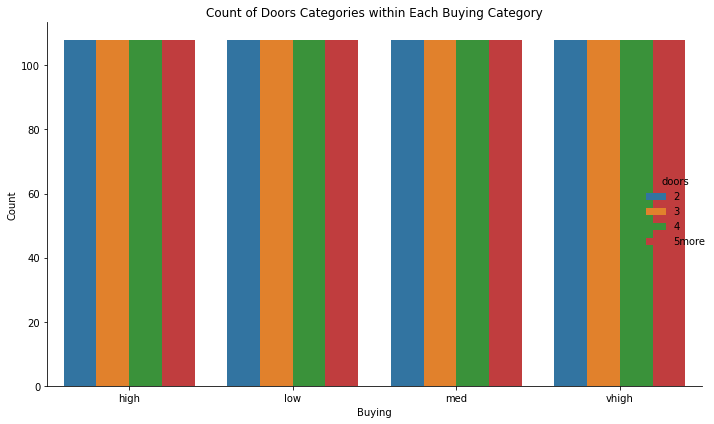

<Figure size 864x576 with 0 Axes>

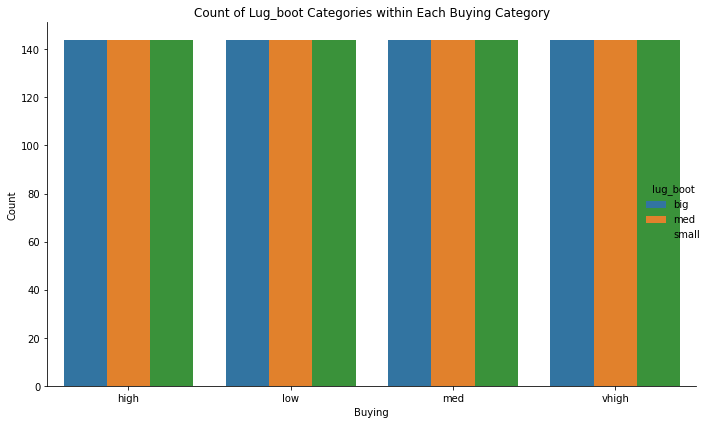

<Figure size 864x576 with 0 Axes>

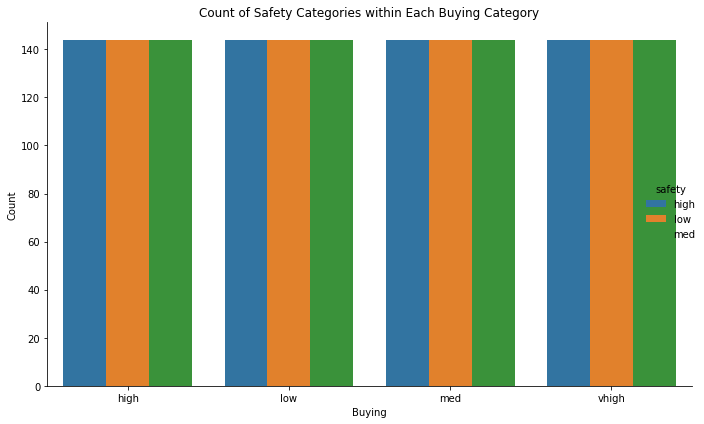

<Figure size 864x576 with 0 Axes>

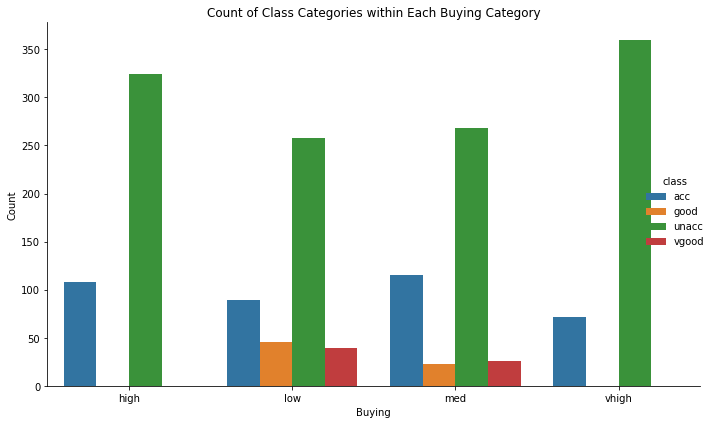

In [7]:
columns_to_plot = ['maint', 'doors', 'lug_boot', 'safety', 'class']

def plot_buying_vs_column(df, column):
    grouped_data = df.groupby(['buying', column]).size().reset_index(name='count')
    plt.figure(figsize=(12, 8))
    sns.catplot(x='buying', y='count', hue=column, data=grouped_data, kind='bar', height=6, aspect=1.5)
    plt.title(f'Count of {column.capitalize()} Categories within Each Buying Category')
    plt.xlabel('Buying')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

for column in columns_to_plot:
    plot_buying_vs_column(car_evaluation_df, column)

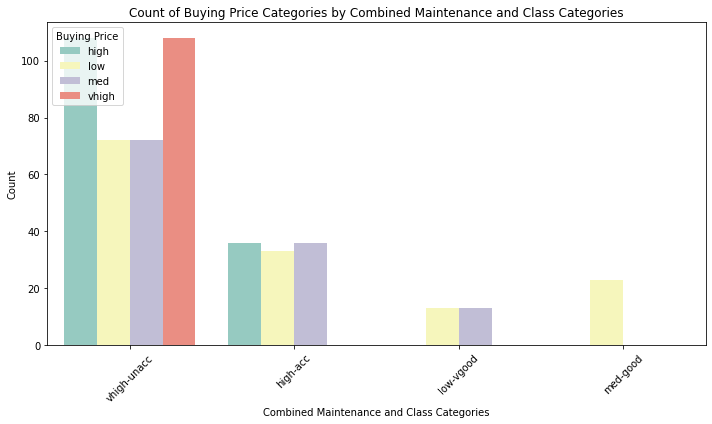

In [16]:
# Define mapping dictionary for combined categories
maint_class_mapping = {
    ('vhigh', 'unacc'): 'vhigh-unacc',
    ('high', 'acc'): 'high-acc',
    ('med', 'good'): 'med-good',
    ('low', 'vgood'): 'low-vgood'
}

# Combine 'maint' and 'class' categories
car_evaluation_df['maint_class_mapping'] = car_evaluation_df.apply(lambda row: category_mapping.get((row['maint'], row['class'])), axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='maint_class_mapping', hue='buying', data=car_evaluation_df, palette='Set3')
plt.title('Count of Buying Price Categories by Combined Maintenance and Class Categories')
plt.xlabel('Combined Maintenance and Class Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Buying Price')
plt.tight_layout()
plt.show()